In [1]:
using Catlab

# **What is "C-sets"?**

In **Catlab**, we use **C-sets** as the core data structure for representing different *shapes* of diagrams.

A **C-set** is a:

> **Functor**  
> from a **schema** (a small category $\mathcal{C}$)  
> to the **category of sets** ($\mathbf{Set}$)  
>  
> i.e., **$ X : \mathcal{C} \to \mathbf{Set} $**

This means a C-set:

- assigns an **object** in the schema $\mathcal{C}$ to a **set** (an object in the category $\mathbf{Set}$), and  
- assigns a **morphism** in the schema $\mathcal{C}$ to a **function** in the category $\mathbf{Set}$.

Below are some examples:


## 1 Basic Graphs (Directed Graphs) 

## 1.1 Define Schemas

A schema is a small category $\mathcal{C}$ encoding the structure of a specific type of diagram.

<img src="fig/Sch_SimpleGraph.png"
     style="width:220px; display:block; margin-left:0 !important; margin-right:auto !important;">

    (Free Category)

In [2]:
@present SchGrph(FreeSchema) begin
  V::Ob
  E::Ob
  src::Hom(E,V)
  tgt::Hom(E,V)
end;

Visualization of schema:

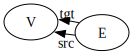

In [3]:
to_graphviz(SchGrph)

## 1.2 Define Instances of Schemas (C-sets)

In [4]:
@acset_type Grph(SchGrph, index=[:src,:tgt])
grph_1 = @acset Grph begin
  V = 2
  E = 1
  src = [1]
  tgt = [2]
end

E,src,tgt
1,1,2


## 1.3 Visualization of Instances 
### 1.3.1 using "Category of Elements"

The category of elements ‘unpacks’ a functor $F$ by creating an object for every element in every $F(C)$, linking them via the original morphisms of $\mathcal{C}$.

Recall that `grph₁` is an instance of the schema $\mathcal{C}$, i.e., a functor: $\mathrm{grph}_1 : \mathcal{C} \to \mathbf{Set}$.  
Therefore, $\mathrm{el}(\mathrm{grph}_1)$ is the category of elements of this functor.

In [5]:
el = elements(grph_1)

Elements{Symbol} {El:3, Arr:2, Ob:2, Hom:2, Name:0}
┌────┬────┐
│ El │ πₑ │
├────┼────┤
│  1 │  1 │
│  2 │  1 │
│  3 │  2 │
└────┴────┘
┌─────┬─────┬─────┬────┐
│ Arr │ src │ tgt │ πₐ │
├─────┼─────┼─────┼────┤
│   1 │   3 │   1 │  1 │
│   2 │   3 │   2 │  2 │
└─────┴─────┴─────┴────┘
┌────┬───────┐
│ Ob │ nameo │
├────┼───────┤
│  1 │     V │
│  2 │     E │
└────┴───────┘
┌─────┬─────┬─────┬───────┐
│ Hom │ dom │ cod │ nameh │
├─────┼─────┼─────┼───────┤
│   1 │   2 │   1 │   src │
│   2 │   2 │   1 │   tgt │
└─────┴─────┴─────┴───────┘

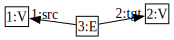

In [6]:
gv = to_graphviz(el, node_labels=true, edge_labels=true)

### 1.3.2 Define a User-Defined Visualization Functions Using Graphviz

E.g., Catlab.jl's predefined visualization functions of Graphs

First, we define a graph `graph_1` using Catlab.jl’s built-in simple graph type `Graph`:

In [7]:
graph_1 = @acset Graph begin
  V = 2
  E = 1
  src = [1]
  tgt = [2]
end

E,src,tgt
1,1,2


Plot it using the visualization function `to_graphviz`:

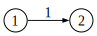

In [8]:
to_graphviz(graph_1, node_labels=true, edge_labels=true)

## 1.4 Define Instances using "Yoneda Embedding"

Yoneda embedding sends each object $C$ of a category $\mathcal{C}$ to its **representable functor** $\mathrm{Hom}_{\mathcal{C}}(-, C)$, encoding all information about $C$.

Here, `yoneda(Grph)` generates the representable C-sets of the graph schema:
- one for a single abstract vertex (V) and 
- one for a single abstract edge (E) with its source and target maps. 
    
Using `@acset_colim`, we glue copies of these representables together according to the specified equations (`src(e1) == v1`, `tgt(e1) == v2`) to construct the concrete graph instance.

In [9]:
y_Grph = yoneda(Grph);

In [10]:
grph_1_colim = @acset_colim y_Grph begin
  (v1,v2)::V; e1::E
  src(e1) == v1
  tgt(e1) == v2
end

E,src,tgt
1,1,2


# More Examples:

## 2 Symmetric Graphs
A symmetric graph is a way of representing an undirected graph by using pairs of opposite directed edges.

<img src="fig/Sch_SymmetricGraph.png"
     style="width:280px; display:block; margin-left:0 !important; margin-right:auto !important;">

$ \mathrm{inv} ⨟ \mathrm{src} = \mathrm{tgt},\quad
  \mathrm{inv} ⨟ \mathrm{tgt} = \mathrm{src},\quad
  \mathrm{inv}^2 = 1_E $

where composition of $f ⨟ g$ means “first $f$, then $g$”.

    (Including Relationships)

In [11]:
@present SchSymmetricGrph <: SchGrph begin
  inv::Hom(E,E)

  compose(inv,inv) == id(E)
  compose(inv,src) == tgt
  compose(inv,tgt) == src
end;

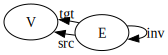

In [12]:
to_graphviz(SchSymmetricGrph)

In [13]:
@acset_type SymGrph(SchSymmetricGrph, index=[:src,:tgt,:inv])
sym_grph_1 = @acset SymGrph begin
  V = 2
  E = 2
  src = [1,2]
  tgt = [2,1]
  inv = [2,1]
end

E,src,tgt,inv
1,1,2,2
2,2,1,1


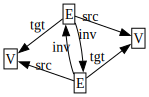

In [14]:
el_sym_grph_1 = elements(sym_grph_1)
to_graphviz(el_sym_grph_1)

In [15]:
y_sym_Grph = yoneda(SymGrph);

In [16]:
# sometimes, using @acset_colim is more easier
sym_grph_1_colim = @acset_colim y_sym_Grph begin
  (v1,v2)::V; e1::E
  src(e1) == v1
  tgt(e1) == v2
end

E,src,tgt,inv
1,1,2,2
2,2,1,1


## 3 Reflexive Graphs
A reflexive graph is a directed graph where every vertex has a distinguished self-loop.

<img src="fig/Sch_ReflexiveGraph.png"
     style="width:220px; display:block; margin-left:0 !important; margin-right:auto !important;">

$ \mathrm{refl} ⨟ \mathrm{src} = 1_V,\quad
  \mathrm{refl} ⨟ \mathrm{tgt} = 1_V$
  
  (Including Relationships)

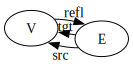

In [17]:
@present SchReflexiveGraph <: SchGraph begin
  refl::Hom(V,E)

  compose(refl, src) == id(V)
  compose(refl, tgt) == id(V)
end;
to_graphviz(SchReflexiveGraph)

In [18]:
@acset_type RGrph(SchReflexiveGraph, index=[:src,:tgt,:refl])
rgrph_1 = @acset RGrph begin
  V = 2
  E = 3
  src = [1,1,2]
  tgt = [1,2,2]
  refl = [1,3]
end

RGrph {V:2, E:3}
┌───┬──────┐
│ V │ refl │
├───┼──────┤
│ 1 │    1 │
│ 2 │    3 │
└───┴──────┘
┌───┬─────┬─────┐
│ E │ src │ tgt │
├───┼─────┼─────┤
│ 1 │   1 │   1 │
│ 2 │   1 │   2 │
│ 3 │   2 │   2 │
└───┴─────┴─────┘

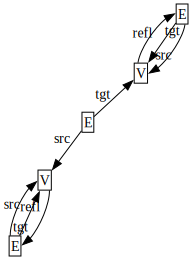

In [19]:
el_rgrph_1 = elements(rgrph_1)
to_graphviz(el_rgrph_1)

In [20]:
y_rGrph = yoneda(RGrph);
rgrph_1_colim = @acset_colim y_rGrph begin
  (v1,v2)::V; e1::E
  src(e1) == v1
  tgt(e1) == v2
end

RGrph {V:2, E:3}
┌───┬──────┐
│ V │ refl │
├───┼──────┤
│ 1 │    1 │
│ 2 │    2 │
└───┴──────┘
┌───┬─────┬─────┐
│ E │ src │ tgt │
├───┼─────┼─────┤
│ 1 │   1 │   1 │
│ 2 │   2 │   2 │
│ 3 │   1 │   2 │
└───┴─────┴─────┘

## 4 Database

<img src="fig/Sch_database.png"
     style="width:480px; display:block; margin-left:0 !important; margin-right:auto !important;">

$ \mathrm{Secr} ⨟ \mathrm{WorksIn} = 1_{Department},\quad
  \mathrm{Mngr} ⨟ \mathrm{WorksIn} = WorksIn$
  
  (Including Relationships)

This example is adapted from ***An Invitation to Applied Category Theory: Seven Sketches In Compositionality*** (Chapter 3) by Brendan Fong and David Spivak.

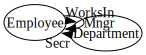

In [21]:
@present SchDb(FreeSchema) begin
  Employee::Ob
  Department::Ob
    
  Mngr::Hom(Employee,Employee)
  WorksIn::Hom(Employee,Department)
  Secr::Hom(Department,Employee)
    
  compose(Secr, WorksIn) == id(Department)
  compose(Mngr, WorksIn) == WorksIn
end;
to_graphviz(SchDb)

### An Instance:

The below instance of the database is also adapted from ***An Invitation to Applied Category Theory: Seven Sketches In Compositionality*** (Chapter 3) by Brendan Fong and David Spivak.

<img src="fig/database_instance.png"
     style="width:680px; display:block; margin-left:0 !important; margin-right:auto !important;">

In [22]:
@acset_type Db(SchDb, index=[:Mngr,:WorksIn,:Secr])
database_1 = @acset Db begin
  Employee = 3
  Department = 2
    
  Mngr = [2,2,3]
  WorksIn = [1,1,2]
  Secr = [1,3]
end

Db {Employee:3, Department:2}
┌──────────┬──────┬─────────┐
│ Employee │ Mngr │ WorksIn │
├──────────┼──────┼─────────┤
│        1 │    2 │       1 │
│        2 │    2 │       1 │
│        3 │    3 │       2 │
└──────────┴──────┴─────────┘
┌────────────┬──────┐
│ Department │ Secr │
├────────────┼──────┤
│          1 │    1 │
│          2 │    3 │
└────────────┴──────┘

## Question: How to labels to objects (e.g., names in the example above)?

By using **attributed C-sets**.

# Optional: Attributed C-sets

Attributed C-sets can add "labels" for objects

<img src="fig/Sch_database_attri.png"
     style="width:480px; display:block; margin-left:0 !important; margin-right:auto !important;">

$ \mathrm{Secr} ⨟ \mathrm{WorksIn} = 1_{Department},\quad
  \mathrm{Mngr} ⨟ \mathrm{WorksIn} = WorksIn$
  
  (Including Relationships)

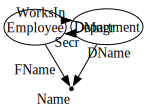

In [23]:
@present SchLabelledDb <: SchDb begin
  Name::AttrType

  FName::Attr(Employee, Name)
  DName::Attr(Department, Name)
end;
to_graphviz(SchLabelledDb)

In [62]:
@acset_type LabelledDb(SchLabelledDb, index=[:Mngr,:WorksIn,:Secr])
labelled_database_1 = @acset LabelledDb{Symbol} begin
  Employee = 3
  Department = 2
    
  Mngr = [2,2,3]
  WorksIn = [1,1,2]
  Secr = [1,3]

  # define attributes (labels)
  FName = [:Alan, :Ruth, :Kris]
  DName = [:Sales, :IT]
end

LabelledDb{Symbol} {Employee:3, Department:2, Name:0}
┌──────────┬──────┬─────────┬───────┐
│ Employee │ Mngr │ WorksIn │ FName │
├──────────┼──────┼─────────┼───────┤
│        1 │    2 │       1 │  Alan │
│        2 │    2 │       1 │  Ruth │
│        3 │    3 │       2 │  Kris │
└──────────┴──────┴─────────┴───────┘
┌────────────┬──────┬───────┐
│ Department │ Secr │ DName │
├────────────┼──────┼───────┤
│          1 │    1 │ Sales │
│          2 │    3 │    IT │
└────────────┴──────┴───────┘

# Optional: Open Graphs using "Structured Cospans"

In [25]:
const OpenGraphOb, OpenGraph = OpenCSetTypes(Graph, :V)

(StructuredCospanOb{Catlab.CategoricalAlgebra.Pointwise.StructuredCospans.FinSetDiscreteACSet{:V, Graph}}, StructuredMulticospan{Catlab.CategoricalAlgebra.Pointwise.StructuredCospans.FinSetDiscreteACSet{:V, Graph}})

In [26]:
graph_2 = @acset Graph begin
  V = 2
  E = 1
  src = [1]
  tgt = [2]
end

E,src,tgt
1,1,2


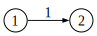

In [27]:
to_graphviz(graph_2, node_labels=true, edge_labels=true)

In [28]:
graph_3 = @acset Graph begin
  V = 3
  E = 4
  src = [1, 2, 3, 3]
  tgt = [2, 3, 2, 3]
end

E,src,tgt
1,1,2
2,2,3
3,3,2
4,3,3


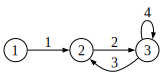

In [29]:
to_graphviz(graph_3, node_labels=true, edge_labels=true)

## Define Open Graphs

In [30]:
open_graph_2 = OpenGraph(graph_2, FinFunction([1],2), FinFunction([2],2));

## We can plot out each legs of the `open graph`

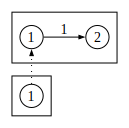

In [39]:
to_graphviz(legs(open_graph_2)[1],node_labels=true, edge_labels=true)

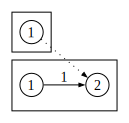

In [40]:
to_graphviz(legs(open_graph_2)[2],node_labels=true, edge_labels=true)

In [31]:
open_graph_3 = OpenGraph(graph_3, FinFunction([1],3), FinFunction([3],3));

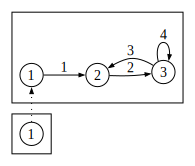

In [41]:
to_graphviz(legs(open_graph_3)[1],node_labels=true, edge_labels=true)

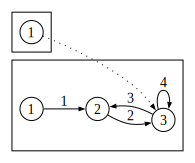

In [42]:
to_graphviz(legs(open_graph_3)[2],node_labels=true, edge_labels=true)

## Define Composing Rule using Undirected Wiring Diagrams

In [55]:
seq = @relation (a,b,c) where (a,b,c) begin
  graph_2(a,b)
  graph_3(b,c)
end;

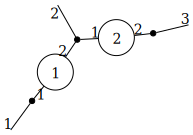

In [56]:
to_graphviz(seq, box_labels=true, port_labels=true)

## Compose Open Graphs

In [57]:
composed_graph23 = oapply(seq, Dict(:graph_2 => open_graph_2, :graph_3 => open_graph_3));

## The apex of the composed open graph, is the composed (closed) graph

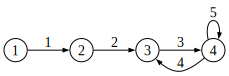

In [58]:
to_graphviz(apex(composed_graph23), node_labels=true, edge_labels=true)

## And we can also plot out all the legs (MultiStructuredCospan)

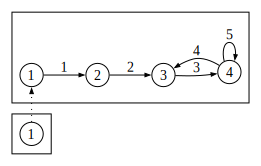

In [59]:
to_graphviz(legs(composed_graph23)[1],node_labels=true, edge_labels=true)

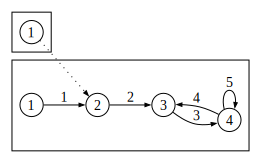

In [60]:
to_graphviz(legs(composed_graph23)[2],node_labels=true, edge_labels=true)

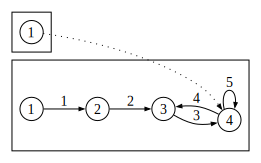

In [61]:
to_graphviz(legs(composed_graph23)[3],node_labels=true, edge_labels=true)